# comparing classifiers

In [26]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

**preprocess dataset, split into training and test part**

In [2]:
import pandas as pd
data_train = pd.read_csv("fmnist/fashion-mnist_train.csv")
data_test = pd.read_csv("fmnist/fashion-mnist_test.csv")

In [3]:
data_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
import numpy as np
# col 0 is the label
# col 1..784 are the pixels
X_train = np.array(data_train.iloc[:, 1:])
y_train = np.array(data_train.iloc[:, 0])
X_test =  np.array(data_test.iloc[:, 1:])
y_test = np.array(data_test.iloc[:, 0])
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [6]:
# Preprocessing Normalized all of the datasets
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

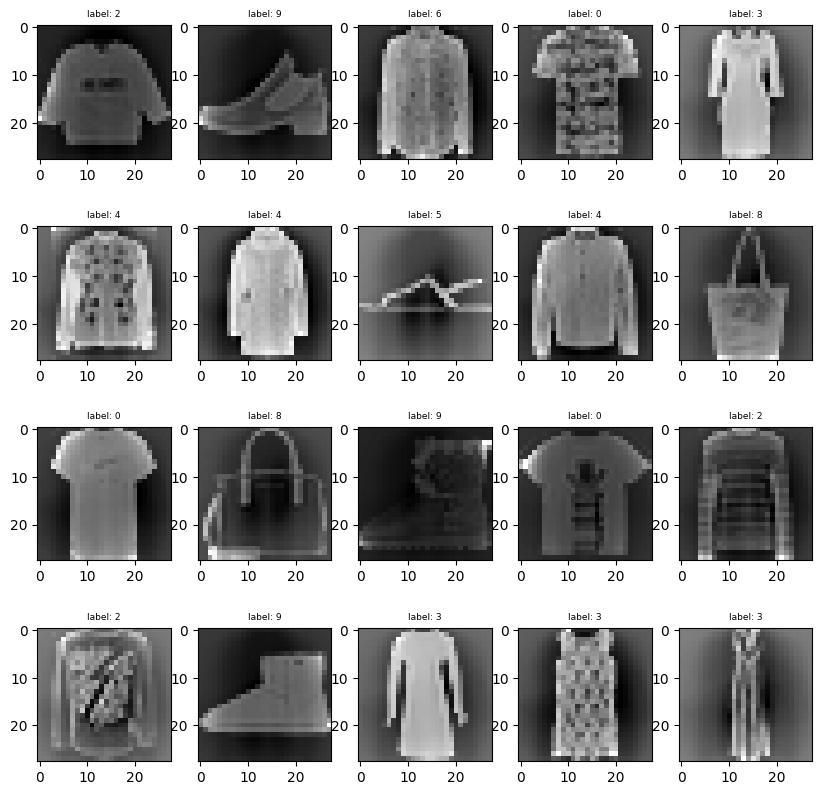

In [7]:
# lets print the normalized data images
import matplotlib.pyplot as plt
n_row = 4
n_col = 5
plt.figure(figsize=(10,10))
for i in list(range(n_row*n_col)):
    plt.subplot(n_row, n_col, i+1)
    plt.imshow(X_train[i,:].reshape(28,28), cmap="gray")
    title_text = "label: " + str(y_train[i])
    plt.title(title_text, size=6.5)

plt.show()

**comparing classifiers**

**Don't rerun these 2 cells, these take a very long time**

In [8]:
stats = pd.DataFrame(data={name: np.zeros(21) for name in names})

for name, clf in zip(names, classifiers):
    print(f"{name}")
    for i in range(1,21):
        max_images = i*50
        clf.fit(X_train[:max_images], y_train[:max_images])
        score = clf.score(X_test, y_test)
        stats[name].iloc[i] = score

Nearest Neighbors
Linear SVM
RBF SVM
Gaussian Process
Decision Tree
Random Forest
Neural Net
AdaBoost
Naive Bayes
QDA


/usr/local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.10/site-packages/sklearn/disc

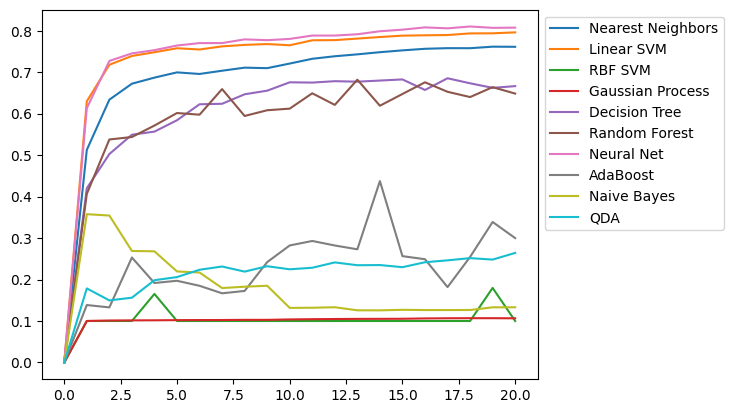

In [16]:
stats.plot().legend(bbox_to_anchor=(1, 1))

**now with active learning**

In [23]:
from skactiveml.pool import UncertaintySampling
from skactiveml.utils import MISSING_LABEL
from skactiveml.classifier import SklearnClassifier

statsal = pd.DataFrame(data={name: np.zeros(21) for name in names})

# query-strategy
qs = UncertaintySampling(method='entropy')

for name, clf in zip(names, classifiers):
    print(f"{name}")
    for i in range(1,21):
        max_images = i*50
        
        # We use the first 10 instances as initial training data.
        X_start = X_train[:10]
        y_start = y_train[:10]
        y_missing = np.full(shape=y_train.shape, fill_value=MISSING_LABEL)
        y_missing[:10] = y_train[:10]

        # Create a new base classifier from the classifier
        clf = SklearnClassifier(clf, random_state=0)

        # Learn the digits on the train subset
        clf.fit(X_start, y_start)

        # Execute active learning cycle.
        n_cycles = 200
        for c in range(n_cycles):
            print("hi", X_train.shape, y_train.shape, clf)
            query_idx = qs.query(X=X_train, y=y_train, clf=clf)
            y_missing[query_idx] = y_train[query_idx]
        
        clf.fit(X_train[~np.isnan(y_missing)], y_train[~np.isnan(y_missing)])
        score = clf.score(X_test, y_test)
        statsal[name].iloc[i] = score

Nearest Neighbors
hi (60000, 784) (60000,) SklearnClassifier(estimator=KNeighborsClassifier(n_neighbors=1), random_state=0)


/usr/local/lib/python3.10/site-packages/skactiveml/base.py:325: UserWarning: 'batch_size=1' is larger than number of candidates. Instead, 'batch_size=0' was set.
  warnings.warn(


ValueError: Found array with 0 sample(s) (shape=(0, 784)) while a minimum of 1 is required by KNeighborsClassifier.